In [77]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

titanic_train = pd.read_csv('raw_data/train_titanic.csv', header=0)

### Find the probability that a passenger survived?

In [78]:
survived = titanic_train[titanic_train.Survived == 1]
survived_percentage = len(survived)/len(titanic_train)
print(survived_percentage)

0.3838383838383838


38% of the passengers in our data survived.

### What is the probability that a survivor was from Cherbourg?

In [79]:
cherbourg_survivors = titanic_train[(titanic_train.Survived == 1) & (titanic_train.Embarked == "C")]
ch_survived_percent = len(cherbourg_survivors)/len(survived)
print(ch_survived_percent)

0.2719298245614035


27% of the survivors were from Cherbourg.

### Plot the distribution of passenger ages.

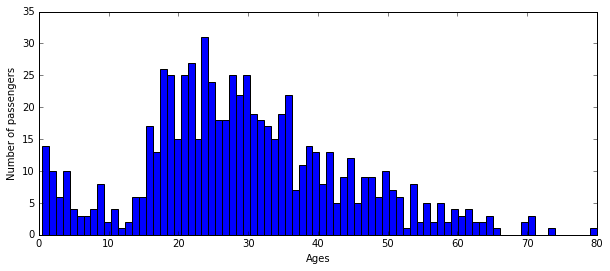

In [87]:
ages = titanic_train.Age.dropna()
H, edges = np.histogram(ages, bins=80)

plt.figure(figsize=(10,4))
ax = plt.subplot(111)
ax.bar(edges[:-1], H, width=edges[1] - edges[0])
ax.set_xlabel('Ages')
ax.set_ylabel('Number of passengers')
plt.show()

### Find the probability that a passenger was between 25 and 40 years old

In [81]:
btw_25_40 = titanic_train[(titanic_train.Age <= 40) & (titanic_train.Age >= 25)]
age_25_40_perc = btw_25_40.Age.count()/titanic_train.Age.count()
print(age_25_40_perc)

0.40056022409


40% of passengers were between the age of 25 and 40.

### Knowing nothing else about the passengers aside from the survival rate of the population (the first question), if I choose 100 passengers at random from the passenger list, what’s the probability that exactly 42 passengers survive?

In [82]:
import math
a = math.factorial(100)
b = math.factorial(58)
c = math.factorial(42)
d = (.38)**42
e = (.62)**58
print((a/(b*c))*d*e)

0.05764782161231151


In [83]:
from scipy.stats import binom

binom.pmf(42, 100, 0.38)

0.057647821612310038

Using the survival probability of 38%, there is a 5% chance that exactly 42 will survive from a random selection of 100 passengers

### What’s the probability that at least 42 of those 100 passengers survive?

In [84]:
prob_42 = binom.cdf(42, 100, 0.38)
print(1 - prob_42)

0.176643990901


There is a 18% chance that from a list of 100 passengers at least 42 will survive.